# Prediction to the risk of heart attack 

## INTRODUCTION

A myocardial infarction, commonly known as a heart attack, occurs when the blood supply to a portion of the heart muscle is inadequate. The more time that goes by without receiving care to improve blood flow, the more damage the heart muscle sustains. (Centers for Disease Control and Prevention, 2022) This is because the coronary arteries that supply blood to the heart muscle become narrowed by a buildup of fat, cholesterol, and other substances called plaque. This slow process is called atherosclerosis. When a plaque in a heart artery ruptures, a blood clot forms around the plaque. A clot stops blood from flowing through an artery to the heart muscle.

Ischemia occurs when the heart muscle is starved of oxygen and nutrients. When ischemia causes part of the heart muscle to be damaged or die, it is called a heart attack or myocardial infarction (MI). (American Heart Association,2022) Nowadays, a heart attack is a common and deadly disease across the world. Every year millions of people suffer from heart attacks that often result in death. If we can predict someone‘s susceptibility to heart failure in advance, we may be able to take preventative measures and save their life!

In this project, we are trying to predict whether or not someone has a high risk of getting a heart attack. We will analyze a dataset with various factors that may influence the risks of getting a heart attack. The Hungarian heart attack data is imported from the UCI machine learning repository, written in .csv format, containing 294 rows and 14 columns. One of the variables, ”num,“ is what we are trying to predict. The values of the ”num“ column are either 1 (high risk) or 0 (low risk). We are going to use knn-classification algorithm to build the classification model.

Our primary research question is: How well can we predict whether somenone has a high risk or low risk of getting a heart attack, or in other words, what is the accuracy of our classification model based on evaluating it on the testing set? We will consider accuracy above 75% as a good classification model.

## METHODS AND RESULTS
### Part 1: Data Summary

Attaching the libraries to be used in our report:
(note: the function `suppressMessages()` is to hide the long command that pop out when attaching the libraries so that the report will look tidier.)

In [1]:
library(tidyverse) |> suppressMessages()
library(repr) |> suppressMessages()
library(tidymodels) |> suppressMessages()
library(cowplot) |> suppressMessages()
library(GGally) |> suppressMessages()
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source("cleanup.R")

set.seed(9999)

#### Reading the data

Firstly, our dataset separator is using comma, so we read the data from our github repository using `read_csv` function. Moreover, our data still does not have any column names, so we set `col_names = FALSE`. Beforehand, we decided to download the original data from UCI machine learning repository and move it into our github repository for the sake of accessibility. For additional information, all of the algorithm below are set to some number of seed so that the result is reproducible.

In [2]:
heart_attack_data_raw = read_csv("https://raw.githubusercontent.com/RichardAdhika22/group115/main/processed.hungarian%20(1).data",
                                col_names = FALSE) |> suppressMessages() 

heart_attack_data_raw

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


Table1: Original data derived from the source.

#### Cleaning and tidying the data

Since the dataframe above does not have any column names, we add the columns' name referring to the information given for each column from the UCI machine learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/). In the next step, we change the data type for `num` from double to factor, so that we can do classification on the variable `num` (classification can only be done on a factor type variable). Furthermore, we also change the data type to all possible predictors from character type to double type so that we can calculate the euclidean distance for all of the possible predictors.

As additional information, each possible predictor meaning is as follow:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptotic)
* trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = probable ventricular hypertrophy)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest

(note: we will not use `slope`, `ca`, and `thal` because these variables have a lot of missing data)

In [3]:
colnames(heart_attack_data_raw) = c('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num')

heart_attack_data_modified = heart_attack_data_raw |>
    mutate(num = as.factor(num),
           age = as.double(age),
           sex = as.double(sex),
           cp = as.double(cp),
           trestbps = as.double(trestbps),
           chol = as.double(chol),
           fbs = as.double(fbs),
           restecg = as.double(restecg),
           thalach = as.double(thalach),
           exang = as.double(exang),
           oldpeak = as.double(oldpeak)) 

heart_attack_data_modified


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,NA,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


Table2: Heart attack data with added column names and converted data type.

#### Selecting useful variables

Here, we are going to remove 3 predictors: `slope`, `ca`, and `thal`. The reason is because these 3 variables have a lot of missing data. Furthermore, we remove the missing data by using the function `drop_na()`. 

In [4]:
heart_attack_data_tidy = heart_attack_data_modified |>
    select(-slope,-ca,-thal)|> 
    drop_na()

heart_attack_data_tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,1,2,130,132,0,2,185,0,0,0
29,1,2,120,243,0,0,160,0,0,0
30,0,1,170,237,0,1,170,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,1
58,0,2,180,393,0,0,110,1,1,1
65,1,4,130,275,0,1,115,1,1,1


Table3: Heart attack table with useful predictors and removed missing data.

#### Splitting the data into training and testing set

As a rule of thumb, we should always split our data into training set and testing set when doing a prediction. All of the exploratory analysis and model below will only be built based on the training data. For the testing data, we will only use it to evaluate the accuracy of our prediction and summarize how well our prediction do. Furthermore, we set `strata = num` so that our target class will be spread evenly between the training data and testing data. Lastly, we use 75 percent of our original dataset as our training data using `prop=0.75`. This number of splitting is reasonable because we have enough data for training as well as for testing.

In [5]:
set.seed(9999)

heart_attack_split = initial_split(heart_attack_data_tidy, prop = 0.75, strata = num)
heart_attack_training = training(heart_attack_split)
heart_attack_testing = testing(heart_attack_split)

In [6]:
heart_attack_training

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,1,2,130,132,0,2,185,0,0,0
29,1,2,120,243,0,0,160,0,0,0
30,0,1,170,237,0,1,170,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,0,3,130,294,0,1,100,1,0,1
56,1,4,155,342,1,0,150,1,3,1
65,1,4,130,275,0,1,115,1,1,1


Table4: Training set of heart attack data that is used for building the model.

In [7]:
heart_attack_testing

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
32,0,2,105,198,0,0,165,0,0,0
33,1,3,120,298,0,0,185,0,0,0
34,0,2,130,161,0,0,190,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,4,160,291,0,1,158,1,3,1
49,1,4,150,222,0,0,122,0,2,1
58,0,2,180,393,0,0,110,1,1,1


Table5: Testing set of heart attack data that is used for evaluating the accuracy.

#### Selecting the best predictors

The visualization below is a density plot that shows the correlations of all possible predictors against the target class. The aim for this visualization is to find the predictors that are driving the classification. Predictors that have a clear separation of each target class are considered as good candidates to be used in the k-nn classification model.

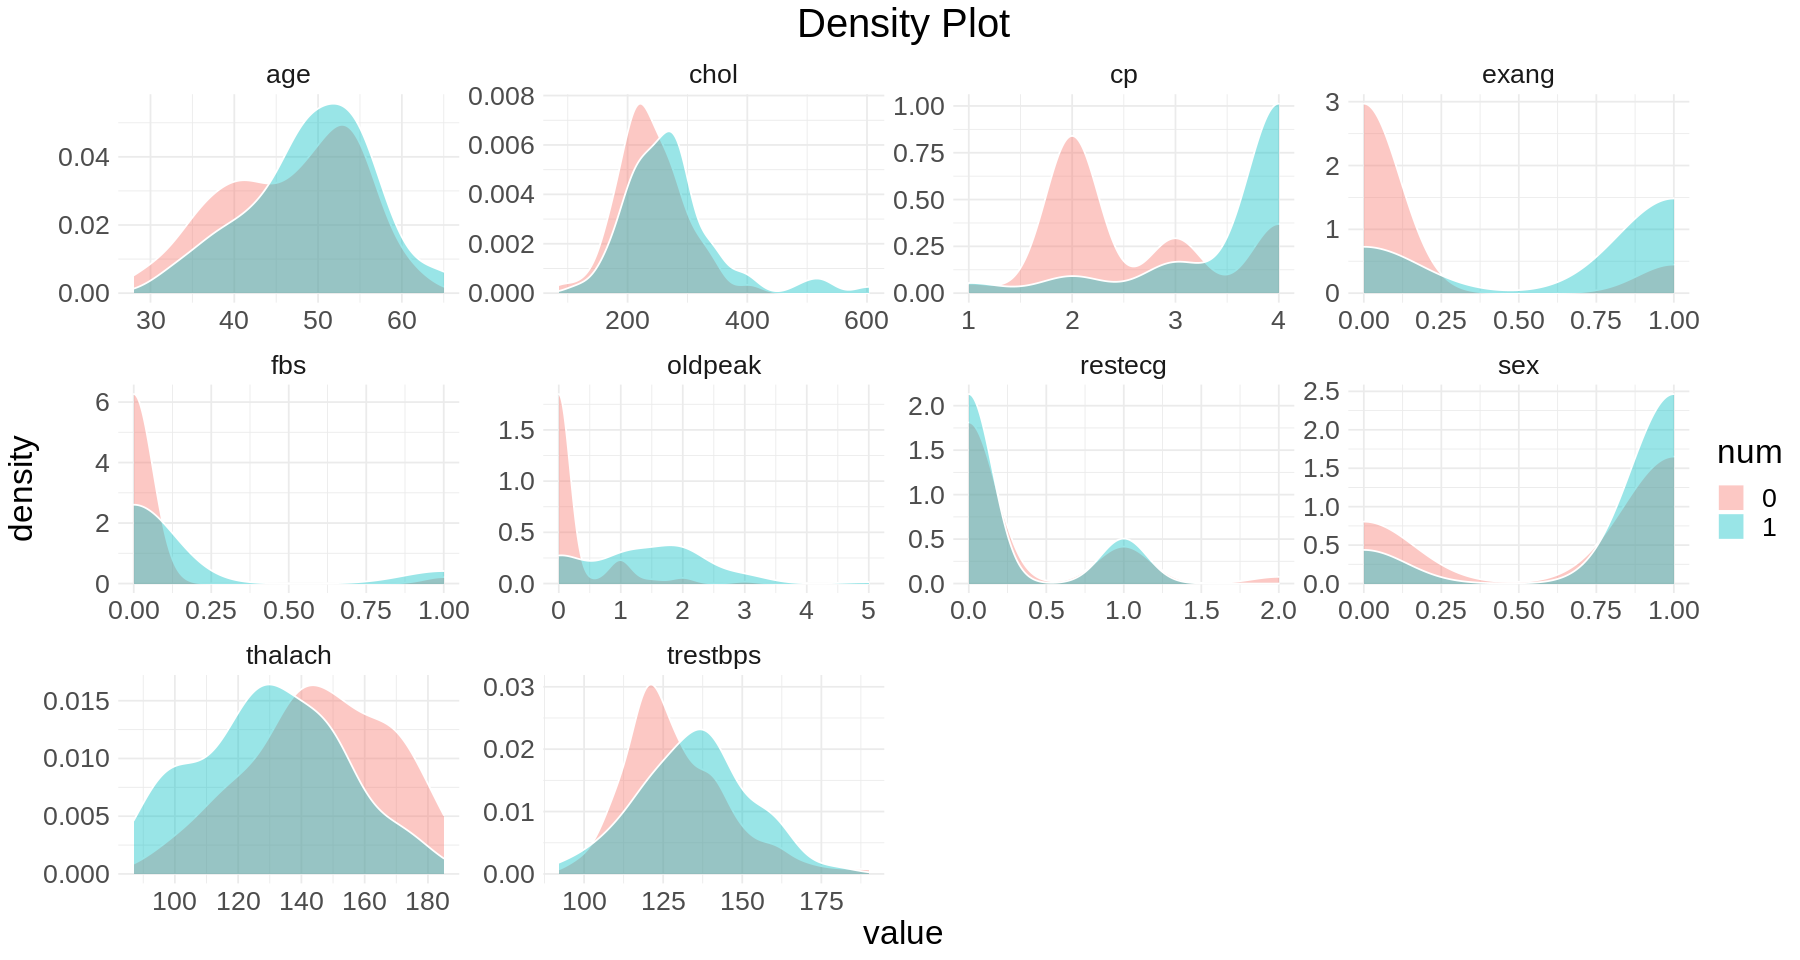

In [8]:
options(repr.plot.height = 8, repr.plot.width = 15)
heart_attack_training |>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        ggtitle("Density Plot")+
        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

Figure1: Plot density of each predictor against target class.

From the visualization below, we can see that the predictors `cp`, `exang`, `oldpeak`, `sex`, and `thalach` have clear separation for each target class. Therefore, we are going to use 5 of these predictors in building the classification model.

In [9]:
heart_attack_selected = heart_attack_training |>
    select(cp, exang, oldpeak, sex, thalach, num)

heart_attack_selected

cp,exang,oldpeak,sex,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0,0,1,185,0
2,0,0,1,160,0
1,0,0,0,170,0
⋮,⋮,⋮,⋮,⋮,⋮
3,1,0,0,100,1
4,1,3,1,150,1
4,1,1,1,115,1


Table6: Heart attack data with selected best predictors.

####  Examining the distribution of the prediction target class

Here, we are going to look at the distibution of the prediction target class by calculating the precentage of each class.  In addition, we are also going to plot in a histogram to visualize the distribution.

In [10]:
total_amount = heart_attack_selected |>
    summarize("total"=n())|>
    pull()

table_num_count = heart_attack_selected |>
    group_by(num) |>
    summarize("total_number_of_num" = n())|>
    mutate("percentage" = total_number_of_num/total_amount*100)

table_num_count 

num,total_number_of_num,percentage
<fct>,<int>,<dbl>
0,122,62.5641
1,73,37.4359


Table6: The number of data in each target class.

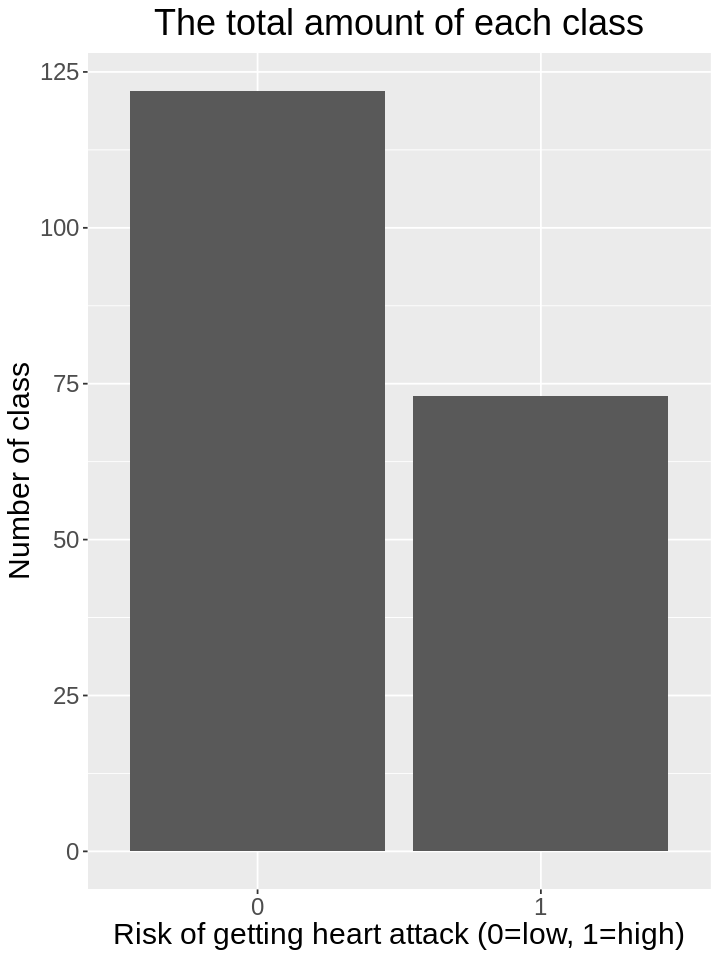

In [11]:
options(repr.plot.width=6, repr.plot.height=8)

num_count_plot = table_num_count |>
    ggplot(aes(x = num, y = total_number_of_num))+
    geom_bar(stat="identity")+
    labs(x = "Risk of getting heart attack (0=low, 1=high)", y = "Number of class")+
    ggtitle("The total amount of each class")+
    theme(text = element_text(size=18), plot.title = element_text(hjust=0.5))

num_count_plot

Figure2: The number of data in each target class.

Looking at the calculation and visualization above, we can conclude that there are more data in the low risk of getting heart attack category (around 62.5 %) than the data in the high risk of getting heart attack.

#### The number of omitted observation

We are interested in finding out how many data are missing or incomplete in our original dataset. We decided to remove these data from the dataset because incomplete data are very difficult to deal with and calculated in building the classification model.

In [12]:
missing_data = nrow(heart_attack_data_raw) - nrow(heart_attack_data_tidy)
missing_data

missing_data_percentage = missing_data/nrow(heart_attack_data_raw)
missing_data_percentage

[1] 33

[1] 0.1122449

We obtain that 33 data are incomplete, which are roughly 11 percent of the total data. These missing data are usually caused by some technical difficulties, such as incomplete data collecting. This number of percentage is still fine because we still have a lot of data left to work with in building the classification model. 

#### Data summary of each predictor variable

The next step is to examine the average and standard deviation of each predictor based on their category.
It is important to understand about how the data look like before proceed into building the model.
We do not make a comparing visualization in this case because the scale of every predictor varies, so making a plot will not be useful.

In [13]:
table_means = heart_attack_selected |>
    group_by(num) |>
    summarize(across(cp:thalach,.fns=list('mean'=mean,'sd'=sd)))

age_mean = table_means |>
    select(cp_mean)|>
    summarize(age_mean = mean(cp_mean))|>
    pull()

trestbps_mean = table_means |>
    select(exang_mean)|>
    summarize(trestbps_mean = mean(exang_mean))|>
    pull()

chol_mean = table_means |>
    select(oldpeak_mean)|>
    summarize(chol_mean = mean(oldpeak_mean))|>
    pull()

thalach_mean = table_means |>
    select(sex_mean)|>
    summarize(thalach_mean = mean(sex_mean))|>
    pull()

oldpeak_mean = table_means |>
    select(thalach_mean)|>
    summarize(oldpeak_mean = mean(thalach_mean))|>
    pull()

table_means

num,cp_mean,cp_sd,exang_mean,exang_sd,oldpeak_mean,oldpeak_sd,sex_mean,sex_sd,thalach_mean,thalach_sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2.631148,0.8832773,0.1311475,0.3389537,0.207377,0.5233661,0.6721311,0.4713726,145.8852,22.23585
1,3.616438,0.7928524,0.6712329,0.4730162,1.321918,1.0252705,0.8493151,0.3602173,129.8630,22.48414


Table7: The mean and standard deviation of each predictor.

#### Distribution of each predictor variable

Next, we are going to plot the distribution and spread of all predictors to get a better sense about the predictors that we are using in building the classification model. We also add a dashed line in each visualization to mark down the average of each predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



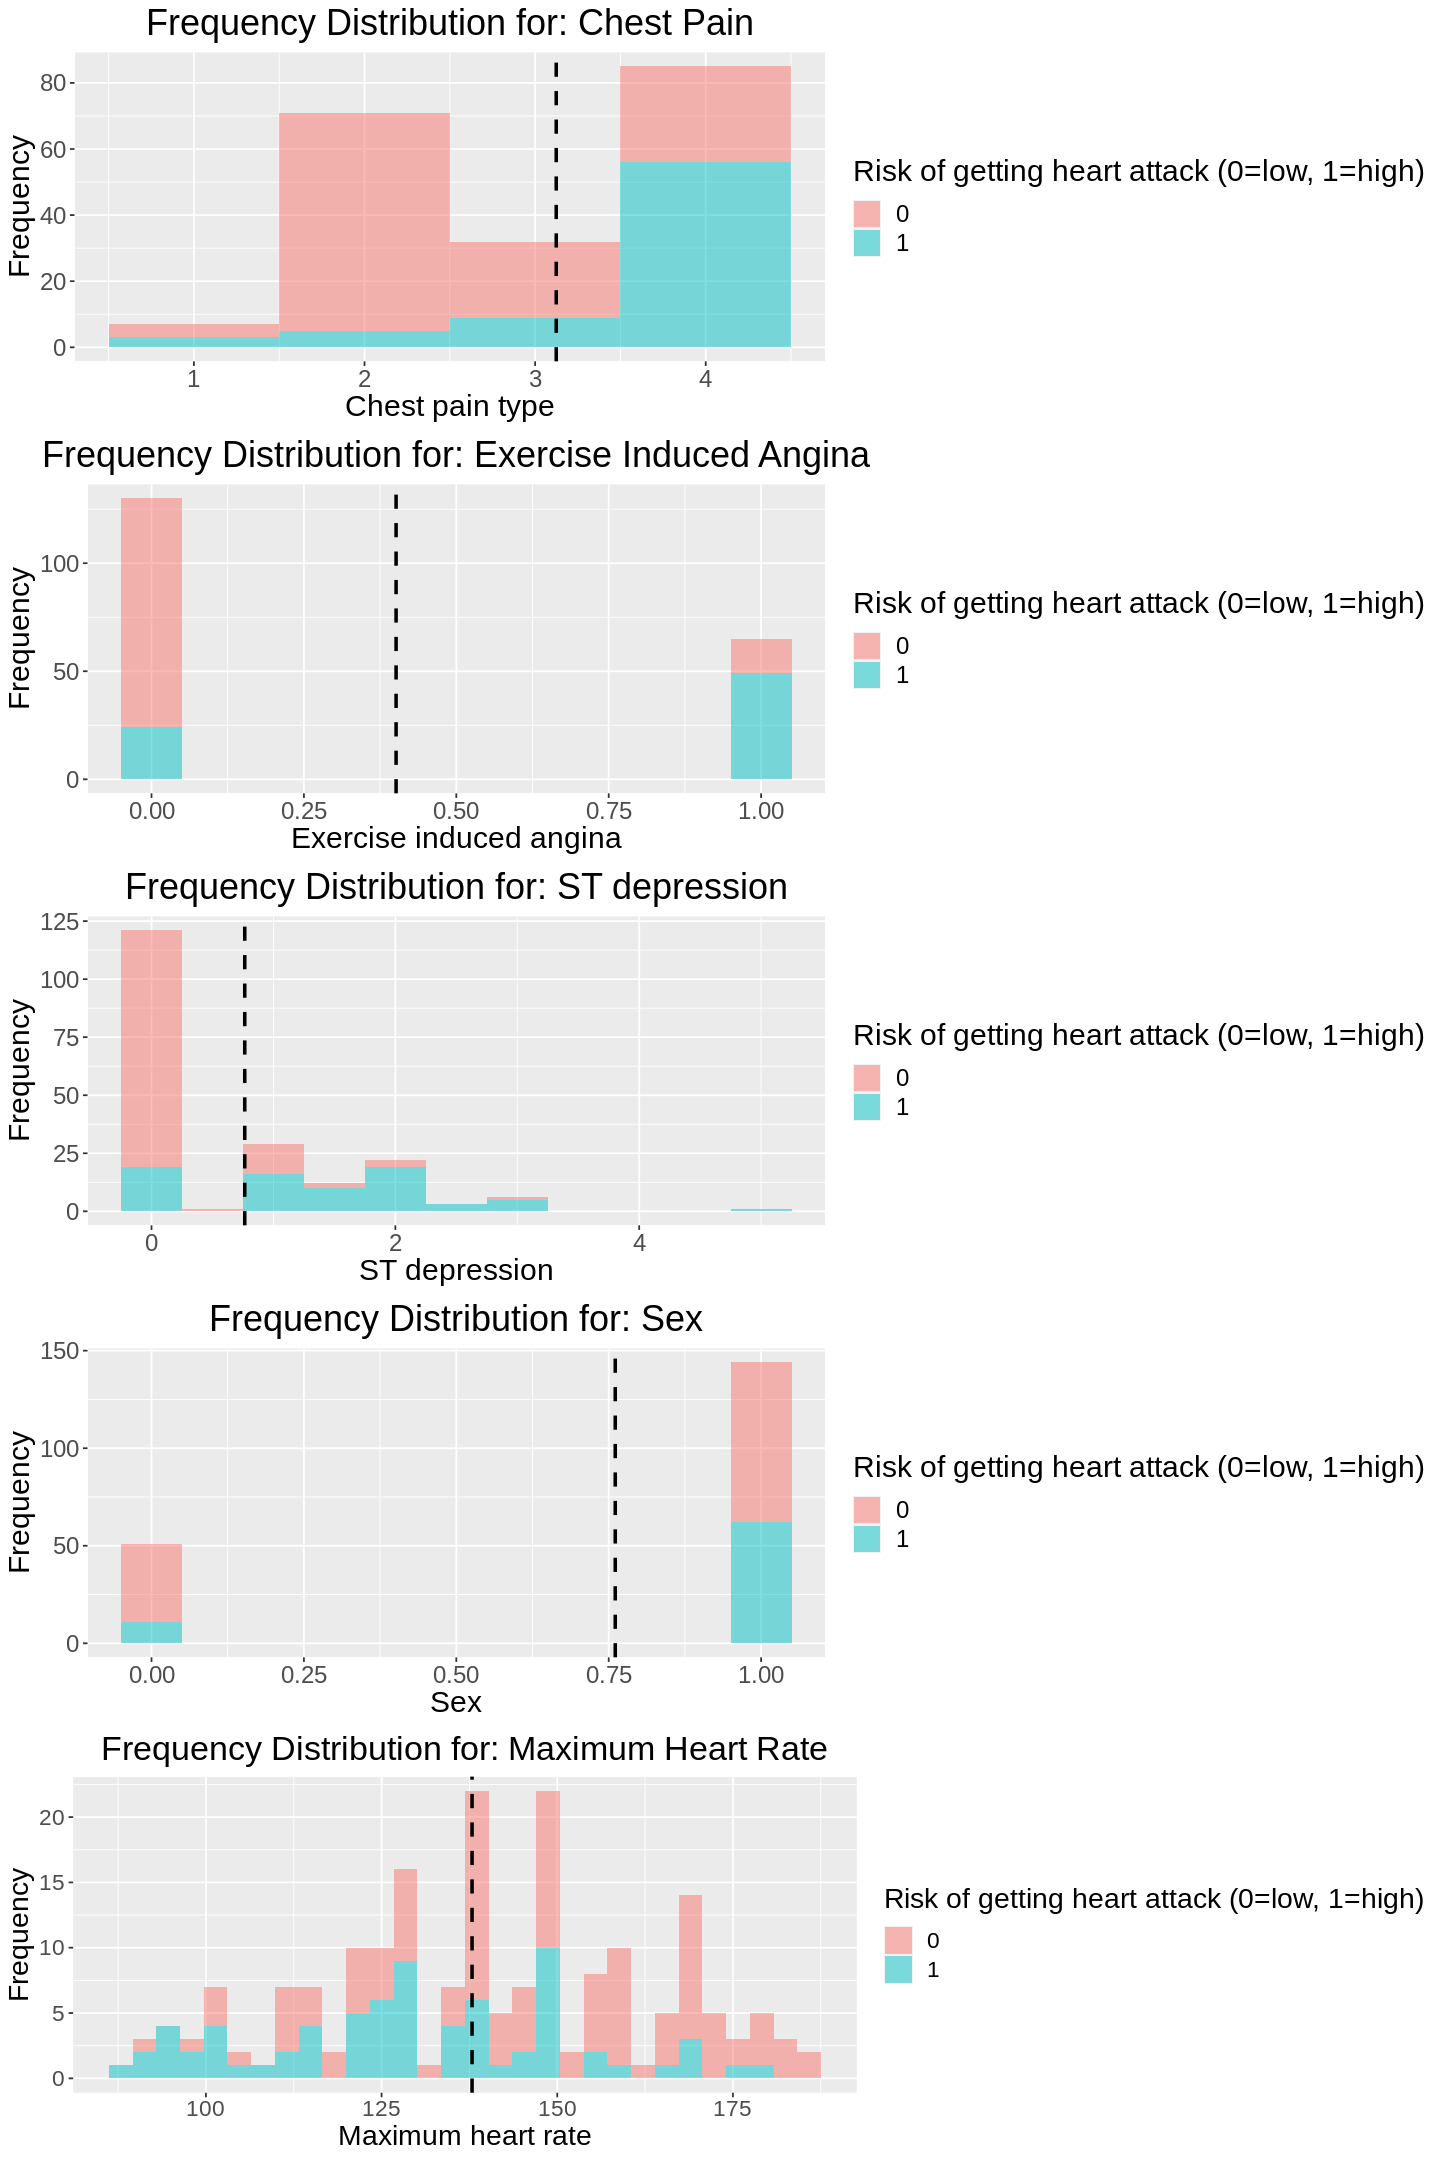

In [14]:
options(repr.plot.width=12, repr.plot.height=18)

age_hist = heart_attack_selected |>
    ggplot(aes(x=cp, fill=num))+
    geom_histogram(alpha=0.5,binwidth = 1)+
    geom_vline(xintercept = age_mean, linetype = "dashed", size = 1)+
    labs(x = "Chest pain type", y = "Frequency", fill = "Risk of getting heart attack (0=low, 1=high)")+
    ggtitle("Frequency Distribution for: Chest Pain")+
    theme(text = element_text(size=18), plot.title = element_text(hjust=0.5))

trestbps_hist = heart_attack_selected|>
    ggplot(aes(x=exang, fill=num))+
    geom_histogram(alpha=0.5, binwidth = 0.1)+
    geom_vline(xintercept = trestbps_mean, linetype = "dashed", size = 1)+
    labs(x = "Exercise induced angina", y = "Frequency", fill = "Risk of getting heart attack (0=low, 1=high)")+
    ggtitle("Frequency Distribution for: Exercise Induced Angina")+
    theme(text = element_text(size=18), plot.title = element_text(hjust=0.5))

chol_hist = heart_attack_selected |>
    ggplot(aes(x=oldpeak, fill=num))+
    geom_histogram(alpha=0.5, binwidth = 0.5)+
    geom_vline(xintercept = chol_mean, linetype = "dashed", size = 1)+
    labs(x = "ST depression", y = "Frequency", fill = "Risk of getting heart attack (0=low, 1=high)")+
    ggtitle("Frequency Distribution for: ST depression")+
    theme(text = element_text(size=18), plot.title = element_text(hjust=0.5))

thalach_hist = heart_attack_selected |>
    ggplot(aes(x=sex, fill=num))+
    geom_histogram(alpha=0.5, binwidth = 0.1)+
    geom_vline(xintercept = thalach_mean, linetype = "dashed", size = 1)+
    labs(x = "Sex", y = "Frequency", fill = "Risk of getting heart attack (0=low, 1=high)")+
    ggtitle("Frequency Distribution for: Sex")+
    theme(text = element_text(size=18), plot.title = element_text(hjust=0.5))

oldpeak_hist = heart_attack_selected |>
    ggplot(aes(x=thalach, fill=num))+
    geom_histogram(alpha=0.5)+
    geom_vline(xintercept = oldpeak_mean, linetype = "dashed", size = 1)+
    labs(x = "Maximum heart rate", y = "Frequency", fill = "Risk of getting heart attack (0=low, 1=high)")+
    ggtitle("Frequency Distribution for: Maximum Heart Rate")+
    theme(text = element_text(size=17), plot.title = element_text(hjust=0.5))

plot_grid(age_hist, trestbps_hist, chol_hist, thalach_hist, oldpeak_hist, ncol=1)

Figure2: The distribution of each predictor along with their averages

Conclusion from the visualization:
- `cp` visualization: spread:1-4, center: roughly 3.1
- `exang` visualization: spread:0 and 1, center: roughly 0.3
- `oldpeak` visualization: spread:0-4, center: roughly 0.8
- `sex` visualization: spread:) and 1, center: roughly 0.75
- `thalach` visualization: spread:75-180, center: roughly 138

Note:
- `cp`: 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptotic
- `exang`: 1 = yes; 0 = no
- `sex`: 1 = male; 0 = female

#### Relationship between each predictor

Below is the plot that shows the correlation between the predictors that we use to build the classification model.

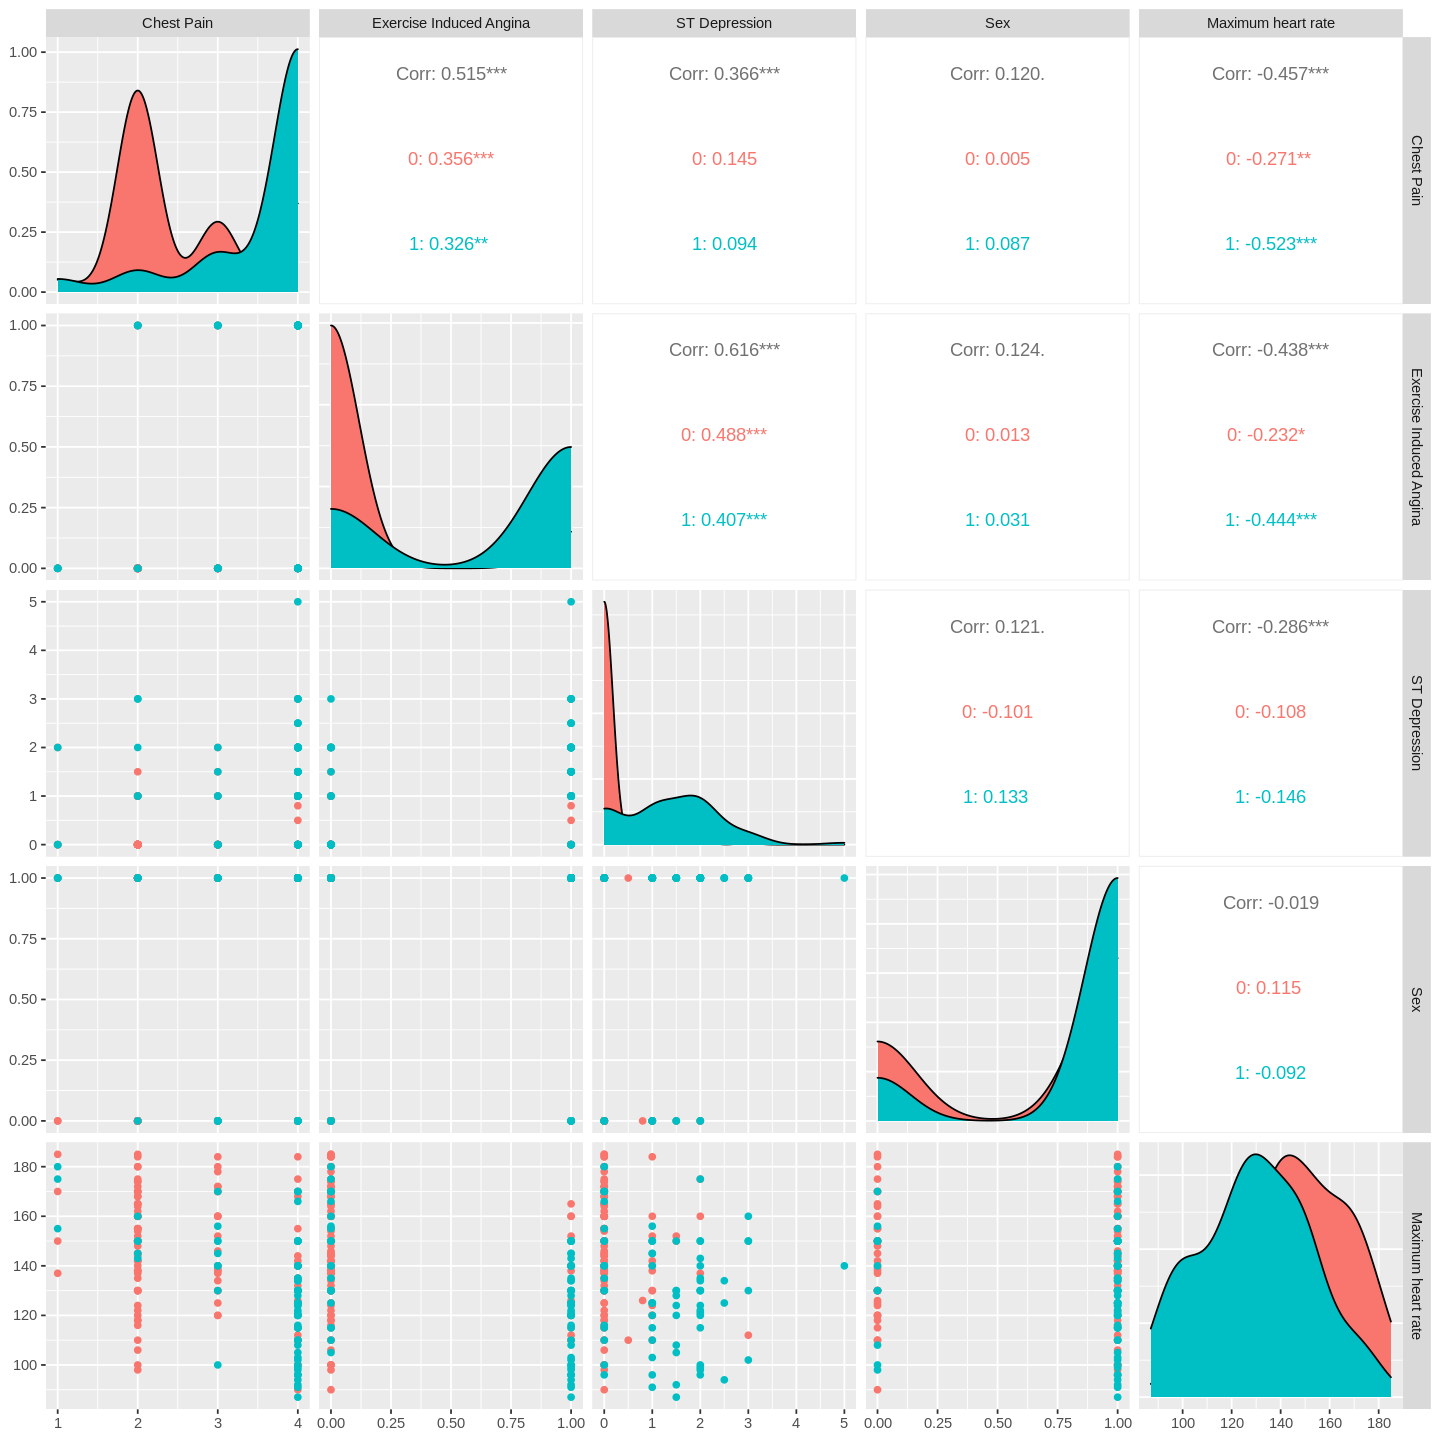

In [15]:
options(repr.plot.width=12, repr.plot.height=12)

predictors_relationship = heart_attack_selected |>
    ggpairs(columns = c("cp", 
                        "exang", 
                        "oldpeak",
                        "sex", 
                        "thalach"), 
            ggplot2::aes(colour=num), 
            columnLabels = c("Chest Pain",
                             "Exercise Induced Angina", 
                             "ST Depression",
                             "Sex",
                             "Maximum heart rate")
           )

predictors_relationship

Figure3: Relationship between each predictor.

## Part 2: Building the classification model

#### Scaling and Centering the variables

In our case, the spread and mean of each variable that we use to predict the target class vary. Therefore, we have to scale and center each value of the predictors so that every predictor will weight the same when calculating the euclidean distance. Each predictor will have mean of 0 and standard deviation of 1 after being scaled and centered.

In [16]:
set.seed(9999)

heart_attack_recipe = recipe(num ~., data = heart_attack_selected)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_attack_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### Using cross validation method to choose the best value for k

Below, we are going to use cross-validation method by dividing the training data into 5 parts and again, setting `strata = num`. The sequence of codes below is to use the cross validation method across different k values (from 1 to 50) to determine which k value should we pick. We then plot the accuraccy versus the number of k plot. By using cross-validation method, we can get an optimized value of k, which we do not want to just pick a random number for it.

In [17]:
set.seed(9999)

heart_attack_vfold = vfold_cv(heart_attack_selected, v = 5, strata = num)

In [18]:
set.seed(9999)

heart_attack_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("classification")
    
heart_attack_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [19]:
set.seed(9999)

k_values = tibble(neighbors = seq(1,50))

heart_attack_workflow = workflow()|>
    add_recipe(heart_attack_recipe)|>
    add_model(heart_attack_spec)|>
    tune_grid(resamples = heart_attack_vfold, grid = k_values)

In [20]:
set.seed(9999)

heart_attack_accuracies = heart_attack_workflow |>
    collect_metrics() |>
    filter(.metric == "accuracy")

heart_attack_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7577935,5,0.03284627,Preprocessor1_Model01
2,accuracy,binary,0.7576653,5,0.03307849,Preprocessor1_Model02
3,accuracy,binary,0.7988462,5,0.03136992,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.8096289,5,0.022159,Preprocessor1_Model48
49,accuracy,binary,0.8096289,5,0.022159,Preprocessor1_Model49
50,accuracy,binary,0.8096289,5,0.022159,Preprocessor1_Model50


Table8: Average accuracy of the prediction across different values of k.

In [21]:
k_max_value = heart_attack_accuracies |>
    arrange(desc(mean))|>
    slice(1)|>
    select(neighbors)|>
    pull()

k_best_accuracy = heart_attack_accuracies |>
    arrange(desc(mean))|>
    slice(1)|>
    select(mean)|>
    pull()

k_max_value

[1] 15

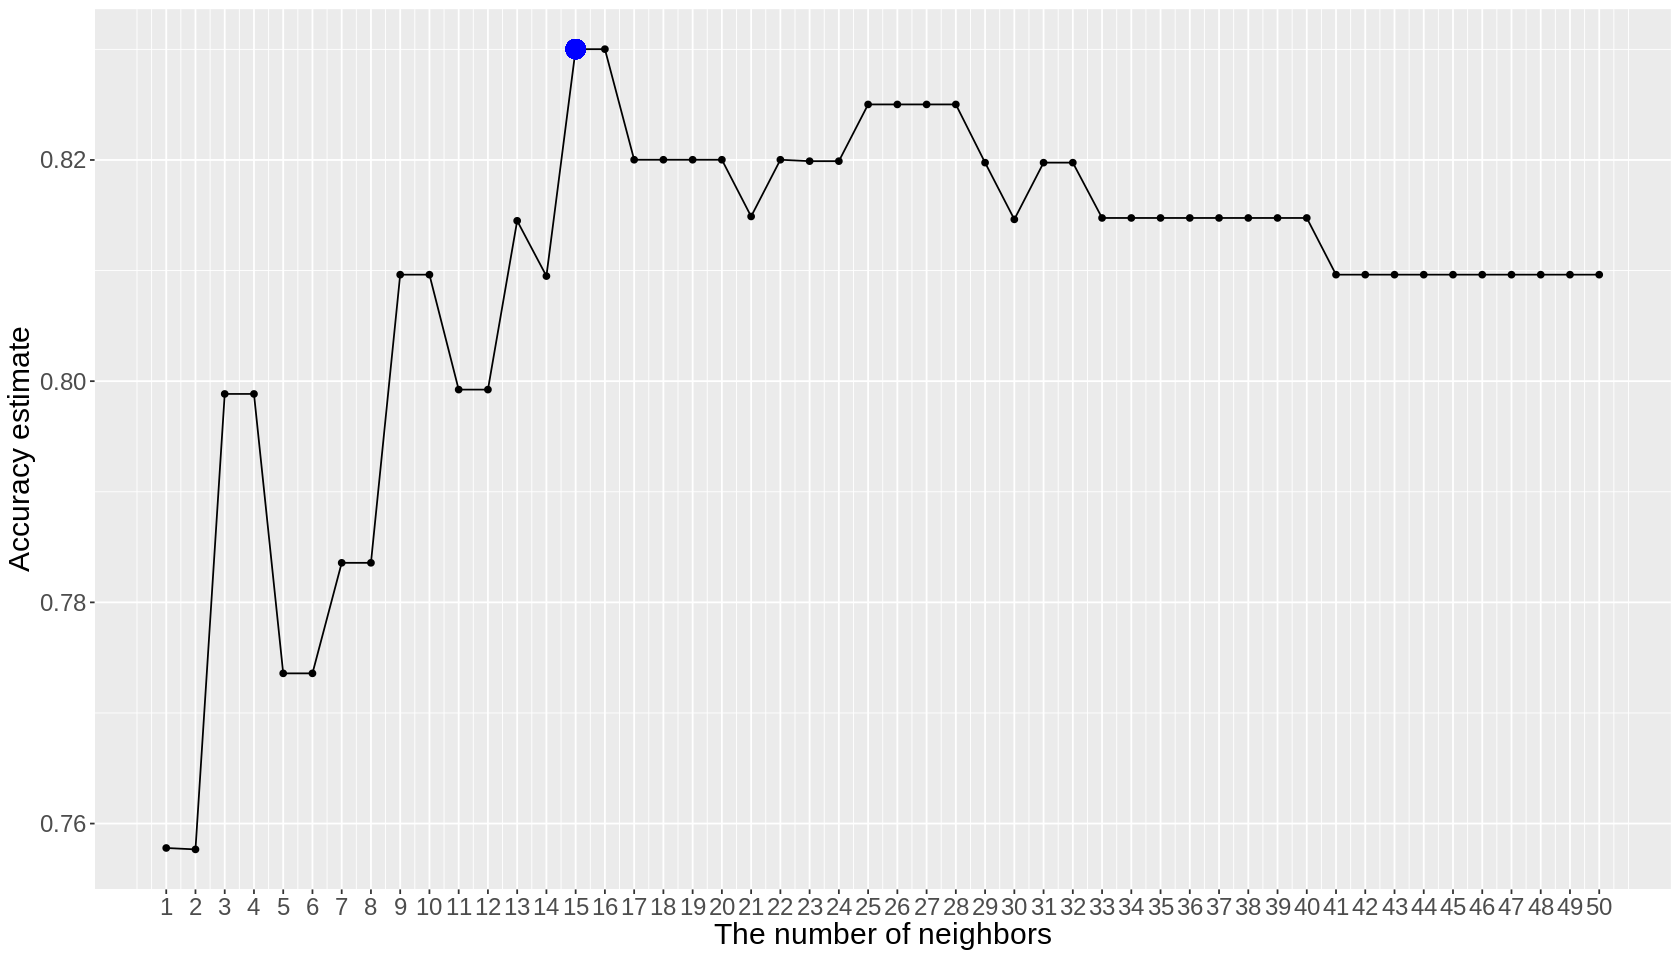

In [22]:
options(repr.plot.width = 14, repr.plot.height = 8)

heart_attack_accuracies_plot = heart_attack_accuracies |>
    ggplot(aes(x = neighbors, y = mean))+
    geom_line()+
    geom_point()+
    geom_point(aes(x=k_max_value, y= k_best_accuracy), size = 5, colour = "blue") +
    labs(x = "The number of neighbors", y = "Accuracy estimate")+
    scale_x_continuous(breaks = seq(1,50, by = 1))+
    theme(text = element_text(size = 18))

heart_attack_accuracies_plot

Figure4: Accuracy vs the values of k plot.

From the visualization above, we can see that the highest accuracy is obtained at k = 15. 

#### Building the final predicition model using the best value of k

After getting the best value of k = 15, which produce the highest accuracy in the training dataset, we are going to build the final predition model using this value of k. Furthermore, we will calculate the accuracy that we obtain when evaluating our model in the testing data and make a confusion matrix to see how many prediction is wrong for each category.

In [23]:
set.seed(9999)

heart_attack_spec_final = nearest_neighbor(weight_func = "rectangular", neighbors = k_max_value)|>
    set_engine("kknn")|>
    set_mode("classification")

heart_attack_spec_final

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = k_max_value
  weight_func = rectangular

Computational engine: kknn 


In [24]:
set.seed(9999)

heart_attack_result = workflow()|>
    add_recipe(heart_attack_recipe)|>
    add_model(heart_attack_spec_final)|>
    fit(heart_attack_selected)

heart_attack_result

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(15L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1948718
Best kernel: rectangular
Best k: 15

In [25]:
set.seed(9999)

heart_attack_prediction = heart_attack_result |>
    predict(heart_attack_testing)|>
    bind_cols(heart_attack_testing)

heart_attack_final_accuracy = heart_attack_prediction |>
    metrics(truth = num, estimate = .pred_class)|>
    filter(.metric == "accuracy")|>
    select(.estimate)|>
    pull()

heart_attack_prediction
heart_attack_final_accuracy

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,32,0,2,105,198,0,0,165,0,0,0
0,33,1,3,120,298,0,0,185,0,0,0
0,34,0,2,130,161,0,0,190,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,47,1,4,160,291,0,1,158,1,3,1
1,49,1,4,150,222,0,0,122,0,2,1
0,58,0,2,180,393,0,0,110,1,1,1


[1] 0.8030303

Table9: Prediction result on the target class in the testing set.

In [26]:
heart_attack_mnist = heart_attack_prediction |>
    conf_mat(truth = num, estimate = .pred_class)

heart_attack_mnist

          Truth
Prediction  0  1
         0 37  9
         1  4 16

Table10: Confusion Matrix showing how many is predicted correctly in each target class.

## Discussion

Based on the final classification model we built, we obtained an accuracy of 80.3% when we evaluated it on the testing set. This accuracy is what we expected to find as our initial accuracy target is above 75 %. Therefore, this is a good classification model.

From the accuracy and confusion matrix, is this classification model suitable for real-world situations? Probably not, because this prediction is about the life and death of people, which is a crucial matter. Moreover, the confusion matrix shows that 11 out of 26 high-risk cases are wrongly predicted. This means that if this situation happens in the real world, 11 out of 26 people will not notice their high risk of a heart attack until it is too late. This is, of course, what we want to happen.

However, we found quite surprising that a lot of factor type predictors, such as exang, age, etc., are included as the best predictors. It is completely different to what we expected that double type of predictors, such as trestbps, chol, etc., will do better in classification model. By double type of data here, we mean that the values of the predictors is not constrained to only a few numbers and generally has larger spread than those of factor type.

The classification model can be better if more data is available. The value of best k and accuracy will be more stable, and thus our final prediction becomes a more accurate interpretation. In this case, we only have 195 observations for the training data, and we notice that changing the value of the seed number can change the value of best k and accuracy by quite a lot. Furthermore, from figure3, each predictor has very low correlation with each other which we hypotesize may cause this significant inconsistent.

Some questions that might appear in the future regarding this prediction: 
* Are there any additional predictor variables to be added (or removed) that can improve the classification model?
* How is the real-world classification of heart attack prediction compared to what we have just built?
* Given the same predictor variables, will our best preditors change if our data size is larger?

## Reference

Centers for Disease Control and Prevention. (2022, July 12). Heart attack symptoms, risk, and recovery. Centers for Disease Control and Prevention. Retrieved December 1, 2022, from https://www.cdc.gov/heartdisease/heart_attack.htm

What is a heart attack? www.heart.org. (2022, March 28). Retrieved December 1, 2022, from https://www.heart.org/en/health-topics/heart-attack/about-heart-attacks

Index of /ml/machine-learning-databases/heart-disease. (n.d.). Retrieved December 1, 2022, from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
